# IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [5]:
# read the train_cleaneds
train_source = pd.read_csv('./data/training_set.csv')
test_source = pd.read_csv('./data/testing_set.csv')

In [6]:
# see the size of the train_cleaneds
train_source.shape, test_source.shape

((3509, 8), (1500, 7))

In [7]:
train_source.head()

,train_idx,Time,Open,High,Low,Close,Volume,label
0,0,2007-03-07 00:00:00,1.31258,1.31844,1.31086,1.31648,1807377.0,0
1,1,2007-03-08 00:00:00,1.31667,1.31813,1.31154,1.31396,1995920.0,1
2,2,2007-03-09 00:00:00,1.31396,1.31583,1.30864,1.31118,1859100.0,1
3,3,2007-03-11 00:00:00,1.31236,1.31415,1.31068,1.31175,192381.0,1
4,4,2007-03-12 00:00:00,1.31193,1.31992,1.31054,7.90878,2009286.0,1


In [8]:
test_source.head()

,test_idx,Time,Open,High,Low,Close,Volume
0,0,2018-05-29 00:00:00,1.16271,1.16394,1.15099,1.15343,336090
1,1,2018-05-30 00:00:00,1.15342,1.16759,1.15186,1.16627,318421
2,2,2018-05-31 00:00:00,1.16627,1.17243,1.16410,1.16938,285788
3,3,2018-06-01 00:00:00,1.16937,1.17178,1.16170,1.16584,253533
4,4,2018-06-03 00:00:00,1.16561,1.16794,1.16561,1.16757,14803


In [9]:
def is_valid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[2]
    high = row[3]
    low = row[4]
    close = row[5]
    volume = row[6]
    # check if all conditions are true
    if low <= high and low <= open and low <= close and high >= open and high >= close and volume > 0:
        return True # the row is valid
    else:
        return False # the row is invalid

In [10]:
# create column 'valid' to indicate if the row is valid
train_source['valid'] = train_source.apply(is_valid, axis=1)

In [11]:
# create column outlier to indicate if the row is outlier, we'll consider outlier if it's out of the iqr
train_source['outlier'] = train_source.apply(lambda row: row[2] < row[3] - 1.5 * (row[3] - row[4]) or row[2] > row[4] + 1.5 * (row[3] - row[4]), axis=1)

In [12]:
train_source[(train_source['valid'] == False) & (train_source['outlier'] == True)]

,train_idx,Time,Open,High,Low,Close,Volume,label,valid,outlier
20,20,2007-03-30 00:00:00,9.326730,1.339850,1.32880,1.33535,881928.0,0,False,True
26,26,2007-04-06 00:00:00,1.342200,1.342680,6.68200,1.33780,393636.0,1,False,True
105,105,2007-07-08 00:00:00,8.179140,1.363370,1.36206,1.36235,57967.0,1,False,True
117,117,2007-07-22 00:00:00,0.172918,1.384380,1.38250,1.38366,267895.0,0,False,True
440,440,2008-08-01 00:00:00,0.194550,1.558860,1.55142,NaN,769017.0,0,False,True
575,575,2009-01-06 00:00:00,1.359100,0.170219,1.33130,1.34785,638062.0,0,False,True
617,617,2009-02-24 00:00:00,10.148400,1.287750,1.26800,1.28485,983781.0,0,False,True
876,876,2009-12-23 00:00:00,1.425530,0.159607,1.42315,1.43351,81125.0,1,False,True
940,940,2010-03-08 00:00:00,1.365340,0.171297,1.36038,1.36229,79503.0,1,False,True
1182,1182,2010-12-15 00:00:00,1.335310,1.337710,9.24546,1.32283,203287.0,0,False,True


In [13]:
# plot non valid data with pyplot
import plotly.express as px
import plotly.graph_objects as go

In [14]:
invalid_data = train_source[(train_source['valid'] == False)]

fig = go.Figure(data=[go.Candlestick(x=invalid_data['Time'],
                open=invalid_data['Open'],
                high=invalid_data['High'],
                low=invalid_data['Low'],
                close=invalid_data['Close'])])

fig.show()

In [15]:
train_source.describe()

,train_idx,Open,High,Low,Close,Volume,label
count,3509.000000,3491.000000,3453.000000,3442.000000,3470.000000,3.481000e+03,3509.000000
mean,1754.000000,1.315917,1.308379,1.298522,1.309465,2.793843e+05,0.499858
std,1013.105375,0.463695,0.361848,0.367142,0.406838,2.995125e+05,0.500071
min,0.000000,0.136331,0.133119,0.133926,0.132743,4.970000e+02,0.000000
25%,877.000000,1.181970,1.184600,1.176797,1.181277,8.122800e+04,0.000000
50%,1754.000000,1.313140,1.318720,1.307255,1.313005,1.912090e+05,0.000000
75%,2631.000000,1.376900,1.381560,1.372110,1.376593,2.699740e+05,1.000000
max,3508.000000,12.604500,11.522790,10.871280,10.877040,2.693602e+06,1.000000


In [16]:
test_source.describe()

,test_idx,Open,High,Low,Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,749.500000,1.125877,1.129278,1.122566,1.125837,2.374014e+05
std,433.157015,0.056683,0.056129,0.057152,0.056673,2.305794e+05
min,0.000000,0.956940,0.967070,0.953570,0.956880,2.343000e+03
25%,374.750000,1.095598,1.099522,1.092465,1.095330,8.010825e+04
50%,749.500000,1.130070,1.133030,1.126825,1.129860,1.947670e+05
75%,1124.250000,1.169507,1.173942,1.166930,1.169610,3.249358e+05
max,1499.000000,1.233240,1.234940,1.226550,1.233240,2.997191e+06


In [17]:
# see the dates maximim and minimum of the train and test train_cleaneds
print("Train: ", train_source["Time"].min(), train_source["Time"].max()) 
print("Test: ", test_source["Time"].min(), test_source["Time"].max()) 

Train:  2007-03-07 00:00:00 2018-05-23 00:00:00
Test:  2018-05-29 00:00:00 2023-03-14 00:00:00


# DUPLICATES

In [18]:
# looking for duplicates
train_source.duplicated().sum()

0

In [19]:
test_source.duplicated().sum()

0

# OUTLIERS

In [20]:
# miramos si los datos tiene valores atípicos con gráficos
train_source  

,train_idx,Time,Open,High,Low,Close,Volume,label,valid,outlier
0,0,2007-03-07 00:00:00,1.31258,1.31844,1.31086,1.31648,1807377.0,0,True,False
1,1,2007-03-08 00:00:00,1.31667,1.31813,1.31154,1.31396,1995920.0,1,True,False
2,2,2007-03-09 00:00:00,1.31396,1.31583,1.30864,1.31118,1859100.0,1,True,False
3,3,2007-03-11 00:00:00,1.31236,1.31415,1.31068,1.31175,192381.0,1,True,False
4,4,2007-03-12 00:00:00,1.31193,1.31992,1.31054,7.90878,2009286.0,1,False,False
...,...,...,...,...,...,...,...,...,...,...
3504,3504,2018-05-18 00:00:00,1.18053,1.18221,1.17498,1.17689,220609.0,1,True,False
3505,3505,2018-05-20 00:00:00,1.17684,1.17756,1.17441,1.17474,18855.0,0,True,False
3506,3506,2018-05-21 00:00:00,1.17473,1.17973,1.17165,1.17913,227861.0,0,True,False
3507,3507,2018-05-22 00:00:00,1.17914,1.18296,1.17567,1.17824,255729.0,0,True,False


In [21]:
train_source.dtypes

train_idx      int64
Time          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
label          int64
valid           bool
outlier         bool
dtype: object

In [22]:
# Set the type of the column "Time" to datetime
train_cleaned = train_source.copy()
train_cleaned['Time'] = pd.to_datetime(train_cleaned['Time'])

We'll start looking at our data using plotly charts. Since we are working with time series with open, high, low, close and volume values, we will use candlestick charts.

In [23]:
import plotly.express as px
import plotly.graph_objects as go

In [24]:
fig = go.Figure(data=[go.Candlestick(x=train_cleaned['Time'],
                open=train_cleaned['Open'],
                high=train_cleaned['High'],
                low=train_cleaned['Low'],
                close=train_cleaned['Close'])])

fig.show()

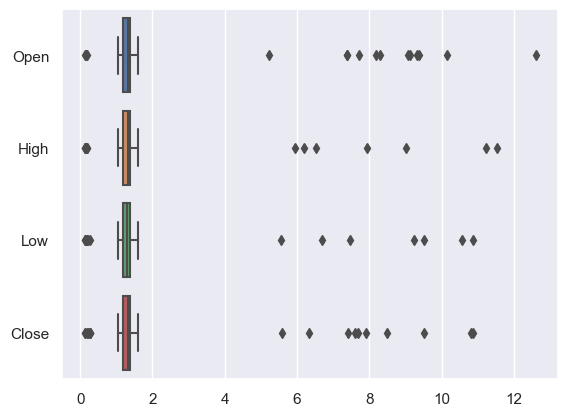

In [25]:
# horizontal boxplot of open, high, low and close prices
sns.set_theme(style="darkgrid")
sns.boxplot(data=train_cleaned[["Open", "High", "Low", "Close"]], orient="h");

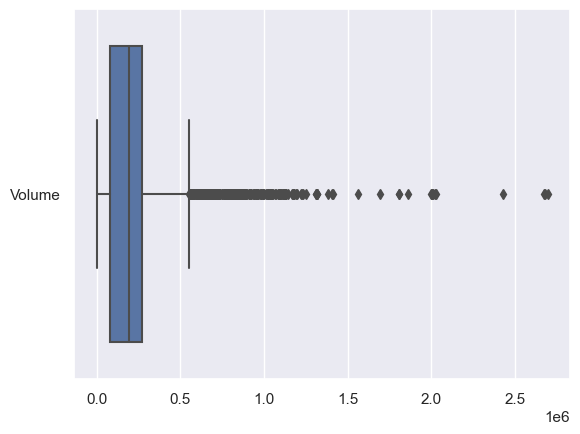

In [26]:
# horizontal boxplot of volume
sns.set_theme(style="darkgrid")
sns.boxplot(data=train_cleaned[["Volume"]], orient="h");

We can observe extreme values in the data, which are outliers. We will try different methods to deal with them.<br>
We also have 'impossible' values such as close values lower than the open value, or high values lower than the low value (Jul 10 2014).<br>
We will try to deal with them too.

In [27]:
def is_valid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[2]
    high = row[3]
    low = row[4]
    close = row[5]
    volume = row[6]
    # check if all conditions are true
    if low <= high and low <= open and low <= close and high >= open and high >= close and volume > 0:
        return True # the row is valid
    else:
        return False # the row is invalid


In [28]:
train_invalid_values = (train_cleaned.apply(is_valid, axis=1)).value_counts()
test_invalid_values = (test_source.apply(is_valid, axis=1)).value_counts()

print("Valid = True\nInvalid = False\n")
print("Train: \n", train_invalid_values)
print("\nTest: \n", test_invalid_values)

Valid = True
Invalid = False

Train: 
 True     3261
False     248
Name: count, dtype: int64

Test: 
 True    1500
Name: count, dtype: int64


## IQR method
First, we'll use the IQR method to detect and remove the outliers. The IQR method is a technique used to detect outliers that uses the interquartile range (IQR) to determine outliers based on a lower bound (first quartile - 1.5 * IQR) and an upper bound (third quartile + 1.5 * IQR). Any data points outside of these bounds are considered outliers and are removed from the dataset.

In [29]:
# Select only the columns with numerical data
num_cols = train_cleaned.select_dtypes(include=[np.number]).columns
# Calculate the first and third quartile
Q1 = train_cleaned[num_cols].quantile(0.25)
Q3 = train_cleaned[num_cols].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Filter out the outliers
train_cleaned_iqr = train_cleaned[~((train_cleaned[num_cols] < (Q1 - 1.5 * IQR)) |(train_cleaned[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
train_cleaned.shape, train_cleaned_iqr.shape, train_cleaned.shape[0]-train_cleaned_iqr.shape[0]

((3509, 10), (2849, 10), 660)

In [31]:
(train_cleaned.shape[0]-train_cleaned_iqr.shape[0])/train_cleaned.shape[0]*100

18.808777429467085

In [32]:
fig_iqr = go.Figure(data=[go.Candlestick(x=train_cleaned_iqr['Time'],
                open=train_cleaned_iqr['Open'],
                high=train_cleaned_iqr['High'],
                low=train_cleaned_iqr['Low'],
                close=train_cleaned_iqr['Close'])])

# save the plot as a png
fig_iqr.write_image("images/plots/candlestick_iqr.png")

fig_iqr.show()

### Other alternatives to deleting outliers
Los valores atípicos son aquellos que se alejan mucho del resto de los datos y pueden afectar al análisis estadístico. Hay varias formas de tratar con los valores atípicos, dependiendo de la causa y el objetivo de tu estudio. Algunas opciones son:

- Verificar que el valor atípico no sea un error de entrada de datos y corregirlo si es necesario¹.
- Eliminar el valor atípico si no es relevante o representa una anomalía que no te interesa¹².
- Asignar un nuevo valor al valor atípico, por ejemplo, la media o la mediana de los datos¹.
- Utilizar métodos estadísticos, basados en distancia, en densidad o en agrupamientos para detectar y tratar los valores atípicos³⁴⁵.
- Utilizar el método Z-Score para identificar y eliminar los valores que se desvían más de un cierto número de desviaciones estándar de la media⁶.


(1) Cómo encontrar fácilmente valores atípicos en Excel - Statologos. https://bing.com/search?q=c%c3%b3mo+tratar+valores+at%c3%adpicos+en+datos Con acceso 7/5/2023.<br>
(2) Valores atípicos (outliers): qué son, ejemplos, calculadora,.... https://www.probabilidadyestadistica.net/valores-atipicos-outliers/ Con acceso 7/5/2023.<br>
(3) 12.6 Valores atípicos - Introducción a la estadística | OpenStax. https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica/pages/12-6-valores-atipicos Con acceso 7/5/2023.<br>
(4) Detección y tratamiento de valores atípicos: una guía para principiantes. https://ichi.pro/es/deteccion-y-tratamiento-de-valores-atipicos-una-guia-para-principiantes-215826140075860 Con acceso 7/5/2023.<br>
(5) Valores atípicos en los datos, ¿cómo identificarlos y mane jarlos?. https://www.jstor.org/stable/26937051 Con acceso 7/5/2023.<br>
(6) Tratar con valores atípicos utilizando el método Z-Score. https://www.zephyrnet.com/es/tratar-con-valores-at%C3%ADpicos-utilizando-el-m%C3%A9todo-de-puntuaci%C3%B3n-z/ Con acceso 7/5/2023.<br>

We will continue with the IQR method. Like we have seen there is 660 rows that have been removed but we do not want that because we have a temporal data. Because of that we will replace them with nan values to treat them in the future.

# NULL VALUES

Like we can see, there are missing values in several variables

In [33]:
train_cleaned_iqr.isnull().sum()

train_idx     0
Time          0
Open         16
High         41
Low          53
Close        29
Volume       28
label         0
valid         0
outlier       0
dtype: int64

In [34]:
# calculate the percentage of null values
train_cleaned_iqr.isnull().sum() / len(train_cleaned_iqr) * 100

train_idx    0.000000
Time         0.000000
Open         0.561601
High         1.439101
Low          1.860302
Close        1.017901
Volume       0.982801
label        0.000000
valid        0.000000
outlier      0.000000
dtype: float64

First we delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume", if there´s any.

In [35]:
# delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume"
train = train_cleaned_iqr.dropna(subset=["Open", "High", "Low", "Close", "Volume"], how='all')

In [36]:
# however there are no rows with the previous columns with null values
train_cleaned_iqr.shape, train.shape

((2849, 10), (2849, 10))

**Now we must fill the missing values somehow**

Care must be taken with the look forward bias for imputation methods. *Look ahead bias* is a type of bias that occurs when a study or simulation relies on data or information that was not yet available or known during the time period being studied. It generally leads to inaccurate results from a study or simulation.

One of the possible methods is interpolation, that assumes a linear relationship (or not lineal, depends on the relation between the variables) between data points and utilises non-missing values from adjacent data points (past and future) to compute a value for a missing data point. Therefore, we reject this method because of the use of look ahead bias.. For that reason we will look for a way to avoid it.

Bearing the above mentioned in mind and the computational resources that we have, there can be several approaches to deal with the null values:

1. Remove the null values.

2. Fill the null values with the value of the previous day.

3. Fill the null values with the total average or moving average.

4. Fill in the null values by adding the value of the row with the average of the variation of the last 10 days. In other words, if we have a null value on December 11, we would calculate the average of the variations of the previous 10 days. That is, if December 1 has a value of 2, December 2 has a value of 3 and so on until the 10th, we have an average variation of 1 ((1+1+1+1+ 1+1+1+1+1+1)/10). Then we would add this variation to the value of row 11.
This method could be useful due to the samll amount of missing values. However, it assumes that the data are stationary and that the variability of the data remains constant over time. It may not be suitable if the data have a trend or seasonality, as it may introduce biases in the imputation.

5. Bayesian posterior consensus distribution that optimally controls the trade-off between look-ahead bias and variance in the imputation. Combine multiple plausible imputations using Bayesian model averaging. It only uses past information data.
This method is more sophisticated and takes into account the uncertainty and prior knowledge in the data. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using a Bayesian approach. This method does not require future data and therefore, avoids look-ahead bias.

6. Wasserstein Interpolation: interpolate probability distributions. The method seeks to find an intermediate distribution between two given distributions that minimizes the wasserstein distance, which measures the minimum **work** required to transform one distribution into the other.
This method is suitable for continuous data and assumes that the data have a probabilistic structure. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using probability distributions (like the previous one). It neither require future data, avoiding look-ahead bias.

For the ***Open*** and ***Close*** variables, it may make more sense to use method 4, which involves filling in the null values by adding the value of the row with the average of the variation of the last 10 days. This is because these variables are directly related to the start and end of a trading period, and using past information to fill in the missing values can help preserve the temporal structure of the data.


On the other hand, the Bayesian posterior consensus and Wasserstein Interpolation methods are more suited for cases where the missing values are not as temporally dependent, and where incorporating prior knowledge and uncertainty may be more useful. For the ***High***, ***Low***, and ***Volume*** variables, these methods may be more appropriate, as they are not as directly tied to the start and end of a trading period, and incorporating uncertainty and prior knowledge can help fill in the missing values in a more robust and accurate manner.

Like we can see on the scatter plot below between Time and High/Low, we have a narrow range of values (ouliers already taken care of). Therefore the Bayesian method could be a suitable choice for imputing missing values on this columns. This is because the Bayesian method is known for its ability to handle small samples sizes and constrained data ranges, which are characteristics of the data. Additionally the Bayesian method can provide a posterior distribution that reflects the uncertainity in the imputed values, which can be useful for downstream analysis.

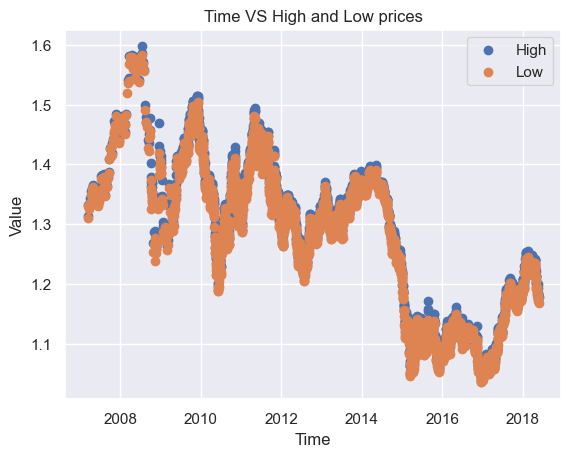

In [37]:
# do a scatter plot between the columns "Time" and "High" 
plt.scatter(train_cleaned_iqr["Time"], train_cleaned_iqr["High"]), plt.scatter(train_cleaned_iqr["Time"], train_cleaned_iqr["Low"])
# incorporate the labels and title and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time VS High and Low prices")
plt.legend(["High", "Low"])

Having chosen the third option for the columns ***Open*** and ***Close***, we will iterate over every row in the DataFrame, and for any row with a null value in the column, it will look at the previous 10 days values, ignore any null values, and calculate the average variation. It will then fill in the null value with the previous day's "Open" and "Close" value plus the average variation.

In [38]:
''' 
Function to fill especifically the null values of the columns "Open" and "Close" by calcultaing the average variation of the previous 10 days 
and adding it to the previous day value of the column
'''
def fill_na_with_variation(df, column):
    for i in range(10, len(df)):
        if pd.isna(df.iloc[i, df.columns.get_loc(column)]):  # check if the value is null
            previous = df.iloc[i-10:i-1, df.columns.get_loc(column)]  # get the previous 10 values
            previous_not_null = previous[~previous.isnull()]  # get the previous values that are not null
            if not previous_not_null.empty:  # check if there are previous values that are not null
                avg_variation = (previous_not_null.diff().mean(skipna=True))  # calculate the average variation
                df.iloc[i, df.columns.get_loc(column)] = df.iloc[i-1, df.columns.get_loc(column)] + avg_variation  # fill the null value with the previous value plus the average variation
            else:  # if the previous 10 days have null values
                df.iloc[i, df.columns.get_loc(column)] = df.iloc[i-1, df.columns.get_loc(column)]  # fill the null value with the previous value
    return df

In [39]:
train_final = fill_na_with_variation(train_cleaned_iqr, "Open")
train_final = fill_na_with_variation(train_final, "Close")

In [40]:
train_final.isnull().sum()

train_idx     0
Time          0
Open          0
High         41
Low          53
Close         0
Volume       28
label         0
valid         0
outlier       0
dtype: int64

As we mentioned above for the ***High*** and ***Low*** columns we will use the Bayesian method.

That method does not have look-ahead bias. The IterativeImputer class in scikit-learn, when used with an appropriate estimator (in this case, BayesianRidge), iteratively fills missing values based on the observed values in the dataset. It does not rely on future or lookahead information.

The IterativeImputer works by modeling each feature with missing values as a function of other features in the dataset. It iteratively estimates the missing values based on the observed values in the same feature and other features. This iterative process helps to capture the relationships and patterns present in the data without using lookahead information.

Therefore, using IterativeImputer with BayesianRidge in the provided code is a suitable approach to fill missing values without introducing look-ahead bia

In [41]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer  # Import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select the columns to fill null values in
cols_to_impute = ['High', 'Low', "Volume"]

# Create a Bayesian Ridge model and an IterativeImputer instance
model = BayesianRidge()
imputer = IterativeImputer(estimator=model)

# Fit the imputer on the training data
imputer.fit(train_final[cols_to_impute])

# Transform the training data to fill null values
train_final[cols_to_impute] = imputer.transform(train_final[cols_to_impute])


/var/folders/99/d8kplvw929bbgrdflfzlrtd40000gn/T/ipykernel_67366/2521931647.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
train_final.isnull().sum()

train_idx    0
Time         0
Open         0
High         0
Low          0
Close        0
Volume       0
label        0
valid        0
outlier      0
dtype: int64

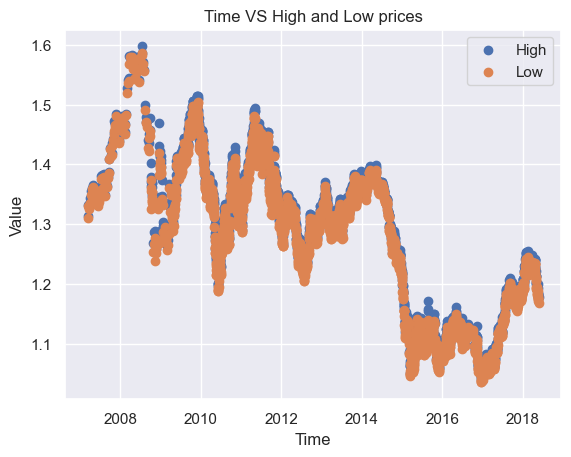

In [43]:
# do a scatter plot between the columns "Time" and "High" 
plt.scatter(train_final["Time"], train_final["High"]), plt.scatter(train_final["Time"], train_final["Low"])
# incorporate the labels and title and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time VS High and Low prices")
plt.legend(["High", "Low"])

The **test**  does not have null values

In [44]:
test_source.isnull().sum()

test_idx    0
Time        0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [45]:
fig_iqr = go.Figure(data=[go.Candlestick(x=train_final['Time'],
                open=train_final['Open'],
                high=train_final['High'],
                low=train_final['Low'],
                close=train_final['Close'])])

# save the plot as a png
#fig_iqr.write_image("images/plots/candlestick_iqr.png")

fig_iqr.show()

In [48]:
train_final[train_final['valid'] == False]

,train_idx,Time,Open,High,Low,Close,Volume,label,valid,outlier
25,25,2007-04-05,1.33720,1.344100,1.335250,1.342250,157243.199860,0,False,False
70,70,2007-05-28,1.34484,1.345790,1.344070,1.344450,157243.199850,1,False,False
201,201,2007-10-28,1.44146,1.442210,1.439880,1.440620,157243.199676,1,False,False
210,210,2007-11-07,1.45527,1.472940,1.454950,1.464780,157243.199635,0,False,False
309,309,2008-03-02,1.51928,1.527453,1.518540,1.521250,34501.000000,1,False,False
...,...,...,...,...,...,...,...,...,...,...
3417,3417,2018-02-06,1.23831,1.247017,1.231380,1.238650,407513.000000,0,False,False
3432,3432,2018-02-23,1.23267,1.232910,1.227980,1.232526,214189.000000,0,False,False
3434,3434,2018-02-26,1.22896,1.235500,1.227760,1.233150,157243.200057,0,False,False
3478,3478,2018-04-18,1.23700,1.239710,1.234180,1.238681,234408.000000,0,False,False


In [74]:
# plot candlestick with plotly, draw vertical line where the values are invalid
fig = go.Figure(data=[go.Candlestick(x=train_final['Time'],
                open=train_final['Open'],
                high=train_final['High'],
                low=train_final['Low'],
                close=train_final['Close'])])

for invalid in train_final[train_final['valid'] == False]['Time']:
    fig.add_shape(type="line",
    x0=invalid,
    y0=1,
    x1=invalid,
    y1=1.65,
    line=dict(color="orange",width=1),
    opacity=0.5)

# add kde with the volume
#fig.add_trace(go.Scatter(x=train_final['Time'], y=train_final['Volume'], name='Volume', yaxis="y2", line=dict(color='blue', width=1)))

fig.show()

Although we have filled the null values, we still have non valid values. For example, we have a close value lower than the open value, or high values lower than the low value (Apr 05 2007). We will try to deal with them too.

In a first approach, we will replace the variable that makes a row "not valid" with the corresponding value of that row. For example, for the variables low and high, we will replace the value of the low variable with the lowest/highest value of that row.

In [75]:
def makeValid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[2]
    high = row[3]
    low = row[4]
    close = row[5]

    # check if low is the lowest value
    if low > min(high, open, close):
        # set lowest value of the four
        low = min(open, high, low, close)

    # check if high is the highest value
    if high < max(open, close, low):
        # set highest value of the four
        high = max(open, high, low, close)

    return [open, high, low, close]

In [77]:
train_final

,train_idx,Time,Open,High,Low,Close,Volume,label,valid,outlier
3,3,2007-03-11,1.31236,1.31415,1.31068,1.31175,192381.00000,1,True,False
9,9,2007-03-18,1.33064,1.33241,1.33064,1.33204,186953.00000,1,True,False
15,15,2007-03-25,1.32801,1.32933,1.32571,1.32689,206877.00000,1,True,False
21,21,2007-04-01,1.33710,1.33770,1.33312,1.33402,83435.00000,1,True,False
25,25,2007-04-05,1.33720,1.34410,1.33525,1.34225,157243.19986,0,False,False
...,...,...,...,...,...,...,...,...,...,...
3504,3504,2018-05-18,1.18053,1.18221,1.17498,1.17689,220609.00000,1,True,False
3505,3505,2018-05-20,1.17684,1.17756,1.17441,1.17474,18855.00000,0,True,False
3506,3506,2018-05-21,1.17473,1.17973,1.17165,1.17913,227861.00000,0,True,False
3507,3507,2018-05-22,1.17914,1.18296,1.17567,1.17824,255729.00000,0,True,False


In [84]:
mask = train_final['valid'] == False
train_final.loc[mask, ['Open', 'High', 'Low', 'Close']] = np.array(train_final[mask].apply(makeValid, axis=1).tolist())

In [83]:
# error with the lenght of zip and list, check the shape of the new values
# create a boolean mask for invalid rows
mask = train_final['valid'] == False

# apply the function only to the invalid rows and store the result in a variable
new_values = list(zip(*train_final[mask].apply(makeValid, axis=1)))

# print the shape of the new values
print(len(new_values), len(new_values[0]))

# print the number of invalid rows
print(sum(mask))

4 159
159


In [86]:
# make valid2 column to check if the values are valid after the function
train_final['valid2'] = train_final.apply(is_valid, axis=1)

/var/folders/99/d8kplvw929bbgrdflfzlrtd40000gn/T/ipykernel_67366/2761944962.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
train_final[(train_final['valid'] == False) & (train_final['valid2'] == False)]

,train_idx,Time,Open,High,Low,Close,Volume,label,valid,outlier,valid2


All the values are valid now. This approach is not the best one, because we are not taking into account the temporal structure of the data and we are arbitrarily replacing the values (low value could be lower than close). However, it is a good first approach to deal with the problem.

Let's recheck the data

In [95]:
# plot candlestick with plotly, draw vertical line where the values are invalid
fig = go.Figure(data=[go.Candlestick(x=train_final['Time'],
                open=train_final['Open'],
                high=train_final['High'],
                low=train_final['Low'],
                close=train_final['Close'])])

for invalid in train_final[train_final['valid2'] == False]['Time']:
    fig.add_shape(type="line",
    x0=invalid,
    y0=1,
    x1=invalid,
    y1=1.65,
    line=dict(color="orange",width=1),
    opacity=0.5)

fig.show()

# REFERENCES

* [What is Look-ahead Bias?](https://corporatefinanceinstitute.com/resources/capital-markets/look-ahead-bias/#:~:text=What%20is%20Look%2Dahead%20Bias,from%20a%20study%20or%20simulation.)
* [Interpolation calculation made ez](https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf)
* [Forward Filtering Backwards Sampling (FFBS) and Look-Ahead Bias](https://stats.stackexchange.com/questions/110944/forward-filtering-backwards-sampling-ffbs-and-look-ahead-bias)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Tradeoff](https://arxiv.org/abs/2102.12736)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Trade](https://www.madrasresearch.org/post/time-series-imputation-with-wasserstein-interpolation-for-optimal-look-ahead-bias-and-variance-trade)